In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from prince import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
import nltk
import seaborn as sns
#nltk.download('stopwords')
plt.style.use('dark_background')


In [34]:
data = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv', parse_dates=['crawl_timestamp'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  1050 non-null   object             
 1   crawl_timestamp          1050 non-null   datetime64[ns, UTC]
 2   product_url              1050 non-null   object             
 3   product_name             1050 non-null   object             
 4   product_category_tree    1050 non-null   object             
 5   pid                      1050 non-null   object             
 6   retail_price             1049 non-null   float64            
 7   discounted_price         1049 non-null   float64            
 8   image                    1050 non-null   object             
 9   is_FK_Advantage_product  1050 non-null   bool               
 10  description              1050 non-null   object             
 11  product_rating           1050 

In [36]:
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56+00:00,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56+00:00,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56+00:00,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52+00:00,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52+00:00,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43+00:00,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43+00:00,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [37]:
data['product_category_tree'].value_counts()

["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                         56
["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]                           26
["Watches >> Wrist Watches >> Maxima Wrist Watches"]                                  23
["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]                         22
["Home Furnishing >> Bath Linen >> Towels"]                                           19
                                                                                      ..
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Infinity India Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Ravishing Variety Ethnic"]     1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Pg handicrafts Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Homedesires Ethnic"]           1
["Watches >> Wrist Watches >> Petrol Wrist Watches"]                                   1
Name: product_categor

In [38]:
data.shape

(1050, 15)

In [39]:
data['general_category'] = data['product_category_tree'].apply(lambda x: x.split(' >> ')[0])
data['general_category'].value_counts()

["Home Furnishing               150
["Baby Care                     150
["Watches                       150
["Home Decor & Festive Needs    150
["Kitchen & Dining              150
["Beauty and Personal Care      150
["Computers                     150
Name: general_category, dtype: int64

In [40]:
len(set(data['uniq_id']))

1050

In [41]:
data[['product_name', 'description']]

,product_name,description
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


In [42]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
data['tokenized_desc'] = data['description'].apply(lambda x: tokenizer.tokenize(x))

In [43]:
stopwords = set(nltk.corpus.stopwords.words('english'))
data['tokenized_desc'] = data['tokenized_desc'].apply(lambda x: [e for e in x if e not in stopwords])

In [44]:
data['tokenized_desc']

0       [Key, Features, Elegance, Polyester, Multicolo...
1       [Specifications, Sathiyas, Cotton, Bath, Towel...
2       [Key, Features, Eurospa, Cotton, Terry, Face, ...
3       [Key, Features, SANTOSH, ROYAL, FASHION, Cotto...
4       [Key, Features, Jaipur, Print, Cotton, Floral,...
                              ...                        
1045    [Oren, Empower, Extra, Large, Self, Adhesive, ...
1046    [Wallmantra, Large, Vinyl, Sticker, Sticker, P...
1047    [Buy, Uberlyfe, Extra, Large, Pigmented, Polyv...
1048    [Buy, Wallmantra, Medium, Vinyl, Sticker, Stic...
1049    [Buy, Uberlyfe, Large, Vinyl, Sticker, Rs, 595...
Name: tokenized_desc, Length: 1050, dtype: object

In [45]:
stemmer = nltk.stem.snowball.EnglishStemmer()
data['tokenized_desc'] = data['tokenized_desc'].apply(lambda x: [stemmer.stem(e) for e in x])

In [46]:
desc_for_tfidf = data['tokenized_desc'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
vector_tfidf = vectorizer.fit_transform(desc_for_tfidf)

In [47]:
vector_tfidf[0][:100]

<1x5036 sparse matrix of type '<class 'numpy.float64'>'
	with 111 stored elements in Compressed Sparse Row format>

In [48]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(vector_tfidf)
X_embedded.shape

(1050, 2)

<AxesSubplot:title={'center':'Visualisation 2D t-SNE du tf-idf des descriptions'}>

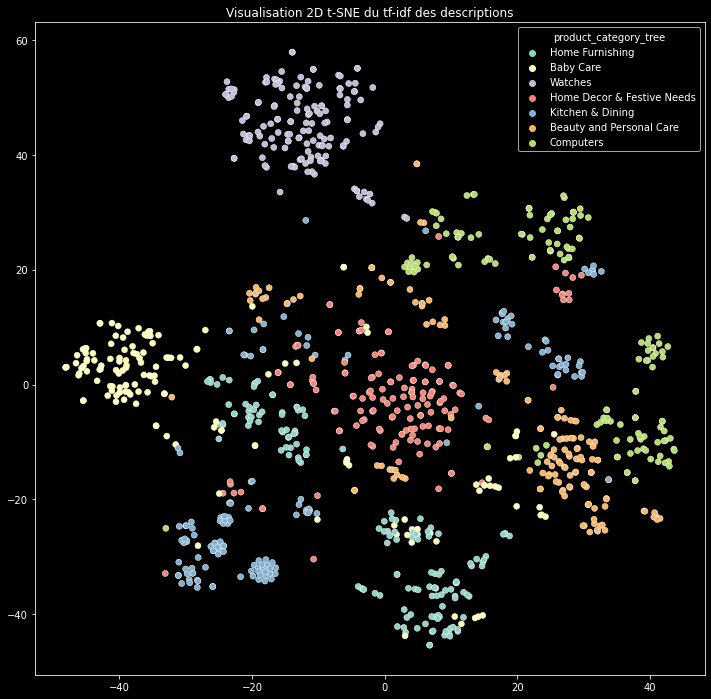

In [49]:
categories = data['product_category_tree'].str.split(' >> ').apply(lambda x:x[0][2:])
plt.figure(figsize=(12,12))
plt.title('Visualisation 2D t-SNE du tf-idf des descriptions')
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=categories)

In [50]:
# from gensim.models import LdaModel
# LdaModel(corpus=vector_tfidf, num_topics=10)

In [51]:
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda.fit(vector_tfidf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [52]:
def display_topics(model, feature_names, nb_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-nb_top_words - 1:-1]]))

no_top_words = 20
display_topics(lda, vectorizer.get_feature_names(), no_top_words)

Topic 0:
mug prithish ceram day guarante 30 product com flipkart replac deliveri genuin buy onli independ free ship onlin combo 225
Topic 1:
cm skin laptop design warranti print shape inch pack color polyest model eyelet showpiec pad mous type box the featur
Topic 2:
belt otherwis when mundan abroad wallet suav lifestyl timepiec sophist whether leather mug touch class watch intric gift kadhai daili
Topic 3:
w6701005 towel wall print steel bowl glass inch akada06 brand tks cut code eurospa for 085 collect prime babi ocean
Topic 4:
com flipkart onli cash genuin ship deliveri buy free on product guarante 30 replac day rs onlin watch analog sticker
Topic 5:
design lamp tabl box power model glass brown 06 ceram rockmantra one jewelkraft number gift size materi parrot lunch screw
Topic 6:
mug our coffe bring perfect gift design cupcak ink freedom messag broadcast laugh sip forget talk catchi express smile mean
Topic 7:
coffe mug it tea printland one perfect ceram togeth wardrob morn fantast 

/Users/julie/PycharmProjects/misc/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [53]:
tfidf_vectorizer_2 = TfidfVectorizer(max_df=0.95, min_df=2, max_features=20, stop_words='english')
tfidf_2 = tfidf_vectorizer_2.fit_transform(desc_for_tfidf)
tfidf_feature_names = tfidf_vectorizer_2.get_feature_names()

no_topics = 10

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit(tfidf_2)

no_top_words = 20
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
guarante 30 replac day onli free buy cash genuin ship deliveri product rs price com flipkart cm featur design mug
Topic 1:
featur free rs day 30 design buy cash cm com deliveri ship genuin guarante mug onli price product replac flipkart
Topic 2:
cm price 30 featur rs design product ship genuin free guarante mug onli deliveri day com replac cash buy flipkart
Topic 3:
price rs free day buy 30 cm featur design cash com deliveri ship genuin guarante mug onli product replac flipkart
Topic 4:
mug day price rs design product featur ship deliveri buy cash cm com flipkart free genuin guarante onli replac 30
Topic 5:
design day rs featur price 30 cm buy cash com deliveri ship free genuin guarante mug onli product replac flipkart
Topic 6:
flipkart com onli rs deliveri genuin cash ship product buy guarante 30 replac day free mug featur design price cm
Topic 7:
product price day flipkart rs buy featur design cash cm com deliveri ship free genuin guarante mug onli replac 30
Topic 8:
replac 

/Users/julie/PycharmProjects/misc/venv/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


In [54]:
ac = PCA(n_components=2)

In [55]:
tfidf_acp = ac.fit_transform(vector_tfidf.toarray())

(-20.0, 20.0)

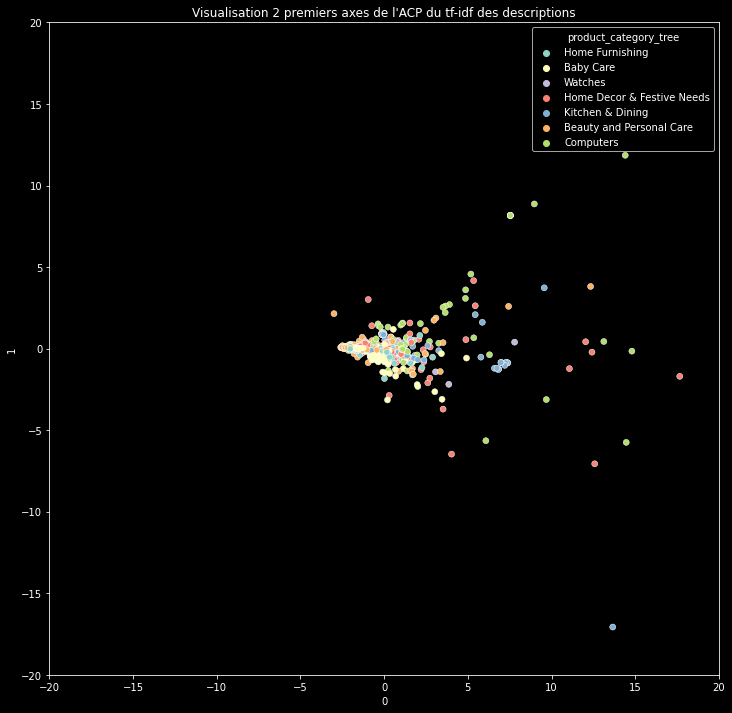

In [56]:
plt.figure(figsize=(12,12))
plt.title("Visualisation 2 premiers axes de l'ACP du tf-idf des descriptions")
sns.scatterplot(x=tfidf_acp[0], y=tfidf_acp[1], hue=categories)
plt.xlim(-20, 20)
plt.ylim(-20, 20)

In [57]:
idx_image = 100
filename_image = 'Flipkart/Images/' + data['image'].iloc[idx_image]
image = Image.open(filename_image)

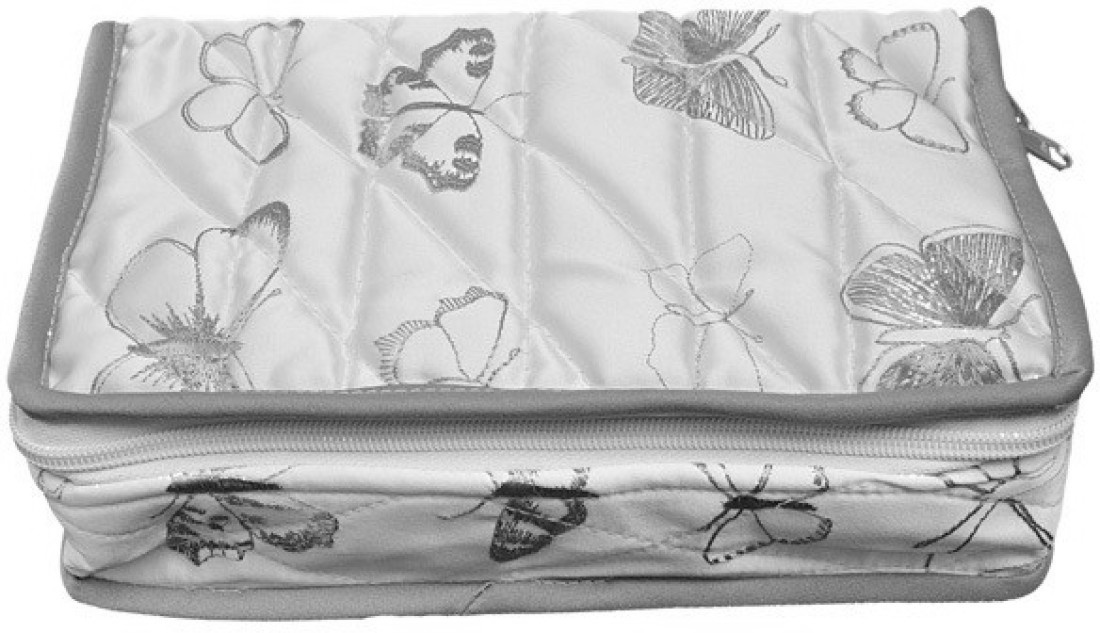

In [58]:
nb_image = image.convert('L')
nb_image

In [59]:
import cv2
img = cv2.imread(filename_image)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)


In [ ]:
kernel3 = np.array([[0, -1,  0], [-1,  5, -1], [0, -1,  0]])
sharp_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel3)
cv2.imshow('Original', img)
cv2.imshow('Sharpened', sharp_img)
cv2.waitKey()
cv2.imwrite('sharp_image.jpg', sharp_img)
cv2.destroyAllWindows()


In [ ]:
#TODO keras :
import tensorflow
